## Libraries

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import mean
from numpy import median
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(30,20)})

## Get the Data

In [29]:
df_accidents = pd.read_csv("Traffic_Accidents.csv")
df_accidents.head()

,id,psn_id,record_status,acd_date,acd_time,acc_location,acc_type,acc_cause,weather,road_status,age,gender,injury_severities,driving_license_issue_date,occupation,intoxication,seat_belt_status,year_manufactured,insurance_company_name
0,2236089,4188137,N,01-01-17,23:15:00,NaN,دهس,الدخول في الشارع قبل التأكد من خلوه,صحواً,معبد - جاف,58.0,M,NaN,18-12-91,كهربائى الات كهربائية,لم يفحص,مستخدم,2014.0,العربية الإسكندنافية للتأمين
1,2246821,4206891,N,01-01-17,05:30:00,شارع الخيل,صدم لوحة إرشادية,القيادة تحت تأثير المسكرات,صحواً,معبد - جاف,28.0,F,NaN,04-05-11,طالب,سكران,مستخدم,2012.0,ادمجى انشورنس كومبانى ليمتد
2,2235511,4187166,N,01-01-17,10:30:00,شارع الخيل الاول,صدم رصيف,الانحراف المفاجئ,صحواً,معبد - جاف,30.0,F,NaN,31-10-11,مدير مبيعات,سكران,غير معروف,2011.0,رويال أند سن الينس للتأمين الشرق الاوسط
3,2261726,4232626,N,01-01-17,01:30:00,شارع المرسى,صدم - مركبة,عدم ترك مسافة كافية,صحواً,معبد - جاف,33.0,F,NaN,12-03-12,NaN,متعاطي للكحول,غير معروف,2008.0,التامين الايرانية
4,2238517,4192374,N,01-01-17,04:04:00,جزيرة النخلة,دهس,السرعة الزائدة,صحواً,معبد - جاف,39.0,M,NaN,04-11-08,مدير مبيعات,غير معروف,غير معروف,2015.0,الصقر الوطنية للتأمين


In [30]:
df_incidents = pd.read_csv("Traffic_Incidents.csv")
df_incidents.head()

,acci_id,acci_time,acci_name,acci_x,acci_y
0,3443323526,12/02/2019 18:00:13,تعطل مركبة على طريق عام,25.015994,55.135174
1,3443346138,12/02/2019 18:58:48,حادث اصطدام بين سيارتين- بسيط,25.209557,55.265157
2,3443335758,12/02/2019 18:29:55,حادث اصطدام بين سيارتين- بسيط,24.960711,55.054373
3,3443342268,12/02/2019 18:48:21,تعطل مركبة على طريق عام,25.255280,55.385368
4,3443347425,12/02/2019 19:02:02,حادث اصطدام بين سيارتين- بسيط,25.220825,55.427275


## Remove incorrect data (y-coordinate < 50)

In [31]:
df_incidents = df_incidents[df_incidents['acci_y']>50]

## Correct data format and add few more

In [32]:
df_accidents['acd_date'] =  pd.to_datetime(df_accidents['acd_date'])
df_accidents = df_accidents.sort_values(by='acd_date')

df_accidents['daymonth'] = df_accidents['acd_date'].dt.day
df_accidents['month'] = df_accidents['acd_date'].dt.month
df_accidents['dayweek'] = df_accidents['acd_date'].dt.day_name()
df_accidents['yearmonth'] = df_accidents['acd_date'].dt.month + 100*df_accidents['acd_date'].dt.year
df_accidents['acc'] = 1

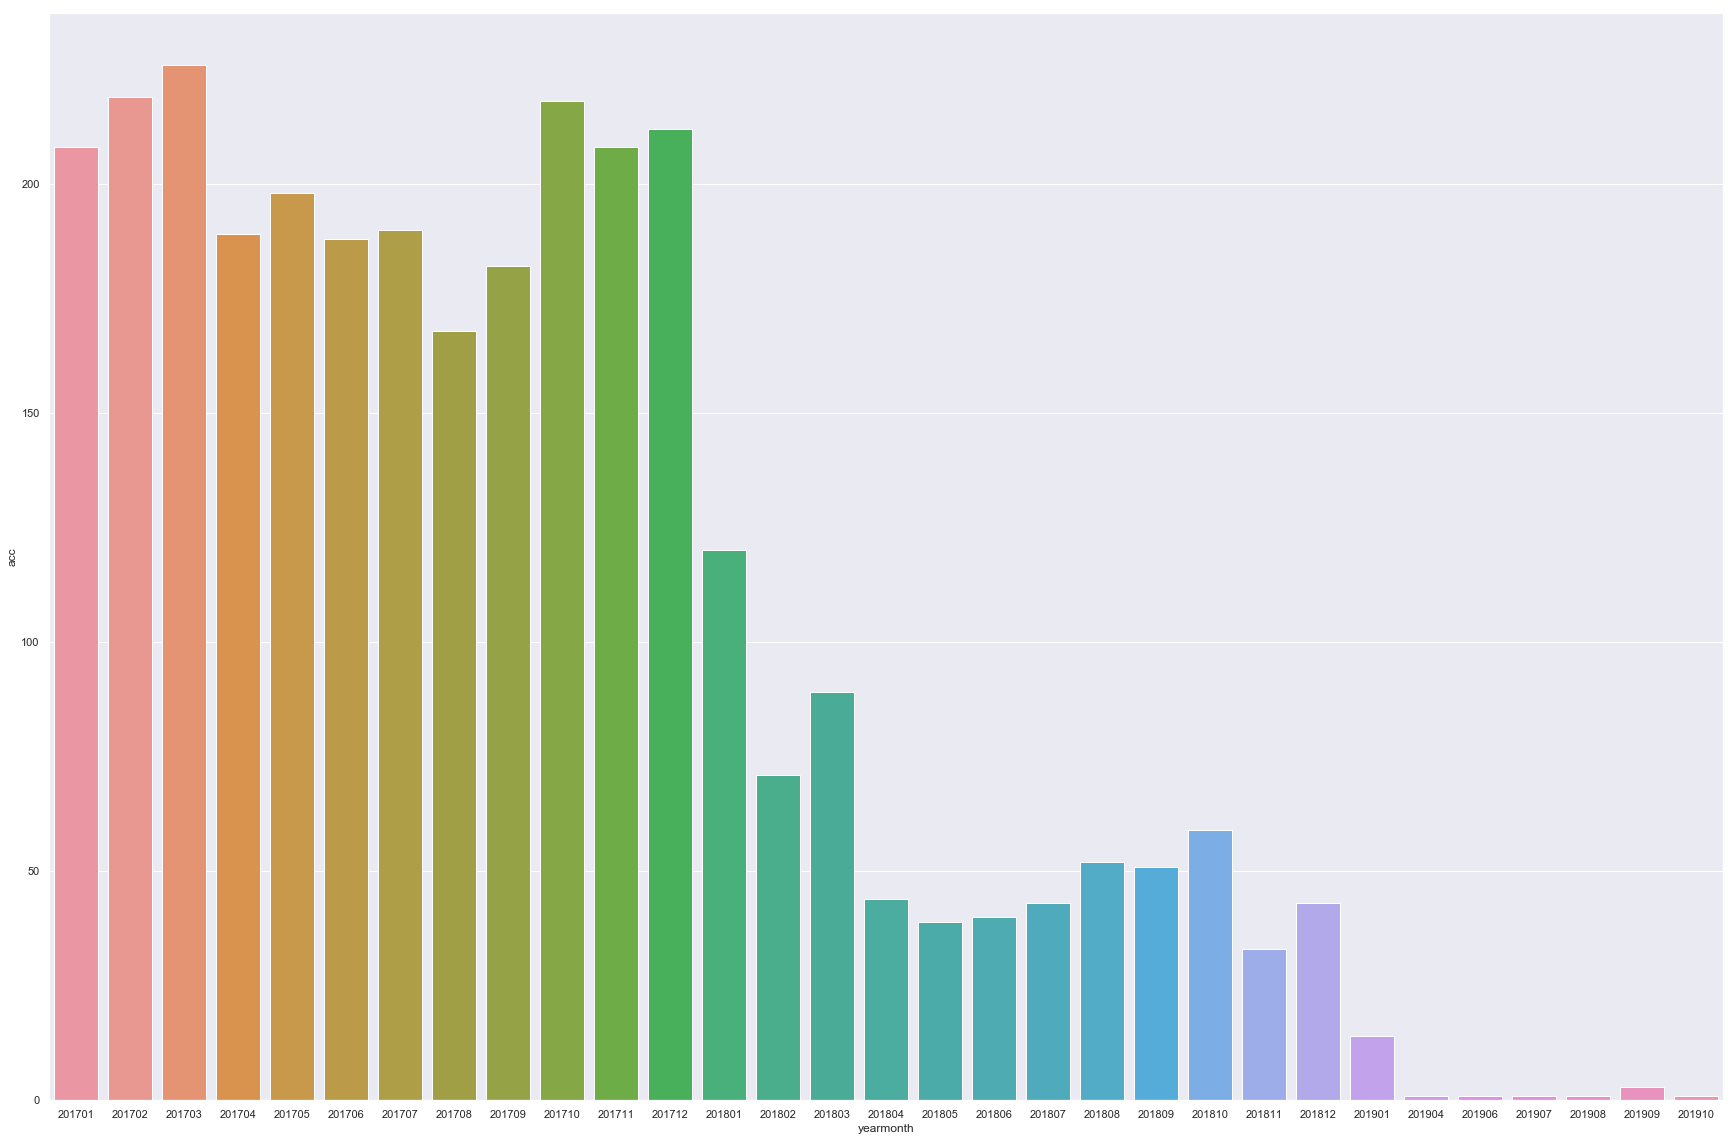

In [33]:
sns.barplot(x='yearmonth',y='acc', data=df_accidents, 
            estimator=sum, 
#             palette = 'spring',
#             hue='year_manufactured',
#             capsize = 0.1, 
            ci = None,
#             dodge = False
           )

## Map the Coordinates

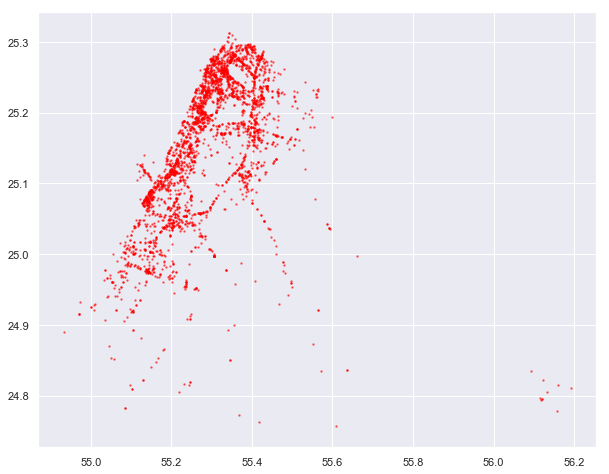

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(df_incidents['acci_y'],
                 df_incidents['acci_x'],
                 color = 'red' , s=2, alpha = 0.5)
plt.show()